In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#parameters
L = 8
T = 1
J = 1
steps = 700
m_avg = 0

N = L**3
theta = np.zeros((L,L,L))
for i in range(L):
    for j in range(L):
        for k in range(L):
            theta[i,j,k] = np.random.uniform(0,2*np.pi)

In [3]:
def find_neighbors(i,j,k):
    coord = np.array(np.meshgrid([i-1,i+1],[j],[k])).T.reshape(-1,3)
    coord = np.vstack((coord,np.array(np.meshgrid([i],[j-1,j+1],[k])).T.reshape(-1,3)))
    coord = np.vstack((coord,np.array(np.meshgrid([i],[j],[k-1,k+1])).T.reshape(-1,3)))
    coord = coord[~(coord == -1).any(1),:]
    coord = coord[~(coord == L).any(1),:]
    return coord

In [4]:
def energy_per_site(i,j,k):
    coord = find_neighbors(i,j,k)
    l = np.ravel_multi_index(coord.T, theta.shape)
    E = -J*np.sum(np.cos(theta[i,j,k] - theta.take(l)))
    return E

In [5]:
def flip():
    i = np.random.randint(0,L)
    j = np.random.randint(0,L)
    k = np.random.randint(0,L)
    theta_b = theta[i,j,k]
    E_b = energy_per_site(i,j,k)
    theta[i,j,k] = np.random.uniform(0,2*np.pi)
    dE = energy_per_site(i,j,k) - E_b
    if dE < 0:
        return True
    elif (np.exp(-dE/T) > np.random.uniform(0,1)):
        return True
    else:
        theta[i,j,k] = theta_b
        return False

In [6]:
def MCMC():
    accept = 0
    for i in range(N):
        v = flip()
        if v:
            accept += 1
    ratio = accept/N   
    return ratio

In [7]:
def magnetization():
    mx = 0
    my = 0
    for i in range(L):
        for j in range(L):
            for k in range(L):
                mx += np.cos(theta[i,j,k])
                my += np.sin(theta[i,j,k])
    return np.sqrt(mx**2 + my**2)/N

In [8]:
def runMCMC():
    m = np.zeros(steps)
    for l in range(steps):
        m[l] = magnetization()
        MCMC()
    m_abs = np.average(np.abs(m))
    return m_abs

In [9]:
Ts = np.linspace(0.1,3,30)
m_avg = np.zeros(len(Ts))
for i in range(len(Ts)):
    T = Ts[i]
    m_avg[i] = runMCMC()

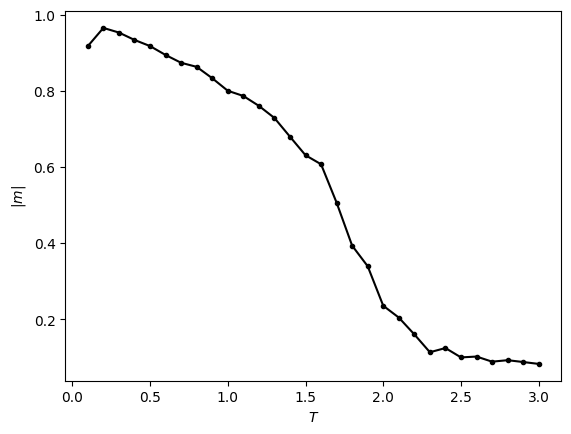

In [10]:
plt.figure()
plt.plot(Ts,m_avg,'k.-')
plt.xlabel('$T$')
plt.ylabel('$|m|$')
plt.show()